In [89]:
import pandas as pd
import tweepy as twt


In [90]:
!pip install tweepy
!pip install textblob

In [110]:
#Twitter API credentials
consumer_key = "MtGPXPXy7mrZw7xbJR61LSdHg"
consumer_secret = "hviC8INqttMLQJlizLY2DyArjuY3MBJdlXvA7Y3Iy8TlYxVz5e"
access_key = "1346042942826270725-T7nx1qEr48jPxwFail7db1PQrsax03"
access_secret = "XNFQ3zkEUyqPPUeazSgLwECKwnTjpjf2WjSBOIeBjAwsm"

alltweets = []


In [113]:
def get_all_tweets(screen_name):
    auth = twt.OAuthHandler(consumer_key,consumer_secret)
    auth.set_access_token(access_key, access_secret)
    api = twt.API(auth)
    new_tweets = api.user_timeline(screen_name = screen_name,count=200)
    alltweets.extend(new_tweets)
    
    oldest = alltweets[-1].id - 1
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = screen_name,count=200,max_id=oldest)
        #save most recent tweets
        alltweets.extend(new_tweets)
        #update the id of the oldest tweet less one
        oldest = alltweets[-1].id - 1
        print ("...%s tweets downloaded so far" % (len(alltweets)))                # tweet.get('user', {}).get('location', {})
 
    outtweets = [[tweet.created_at,tweet.entities["hashtags"],tweet.entities["user_mentions"],tweet.favorite_count,
                  tweet.geo,tweet.id_str,tweet.lang,tweet.place,tweet.retweet_count,tweet.retweeted,tweet.source,tweet.text,
                  tweet._json["user"]["location"],tweet._json["user"]["name"],tweet._json["user"]["time_zone"],
                  tweet._json["user"]["utc_offset"]] for tweet in alltweets]
    
    
    tweets_df = pd.DataFrame(columns = ["time","hashtags","user_mentions","favorite_count",
                                    "geo","id_str","lang","place","retweet_count","retweeted","source",
                                    "text","location","name","time_zone","utc_offset"])
    tweets_df["time"]  = pd.Series([str(i[0]) for i in outtweets])
    tweets_df["hashtags"] = pd.Series([str(i[1]) for i in outtweets])
    tweets_df["user_mentions"] = pd.Series([str(i[2]) for i in outtweets])
    tweets_df["favorite_count"] = pd.Series([str(i[3]) for i in outtweets])
    tweets_df["geo"] = pd.Series([str(i[4]) for i in outtweets])
    tweets_df["id_str"] = pd.Series([str(i[5]) for i in outtweets])
    tweets_df["lang"] = pd.Series([str(i[6]) for i in outtweets])
    tweets_df["place"] = pd.Series([str(i[7]) for i in outtweets])
    tweets_df["retweet_count"] = pd.Series([str(i[8]) for i in outtweets])
    tweets_df["retweeted"] = pd.Series([str(i[9]) for i in outtweets])
    tweets_df["source"] = pd.Series([str(i[10]) for i in outtweets])
    tweets_df["text"] = pd.Series([str(i[11]) for i in outtweets])
    tweets_df["location"] = pd.Series([str(i[12]) for i in outtweets])
    tweets_df["name"] = pd.Series([str(i[13]) for i in outtweets])
    tweets_df["time_zone"] = pd.Series([str(i[14]) for i in outtweets])
    tweets_df["utc_offset"] = pd.Series([str(i[15]) for i in outtweets])
    tweets_df.to_csv(screen_name+"_tweets.csv")
    return tweets_df

pm_ind= get_all_tweets("@ShashiTharoor")

...400 tweets downloaded so far
...600 tweets downloaded so far
...800 tweets downloaded so far
...1000 tweets downloaded so far
...1199 tweets downloaded so far
...1398 tweets downloaded so far
...1598 tweets downloaded so far
...1797 tweets downloaded so far
...1997 tweets downloaded so far
...2197 tweets downloaded so far
...2397 tweets downloaded so far
...2597 tweets downloaded so far
...2797 tweets downloaded so far
...2997 tweets downloaded so far
...3197 tweets downloaded so far
...3212 tweets downloaded so far
...3212 tweets downloaded so far


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


In [118]:
data = pd.read_csv("@ShashiTharoor_tweets.csv",index_col=[0])

In [119]:
data.head(5)

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2021-01-04 15:31:25,[],"[{'screen_name': 'NASA', 'name': 'NASA', 'id':...",160,None,1346117037215518722,en,None,26,False,Twitter for iPhone,The second Indian (&amp; first Malayali) to wi...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None
1,2021-01-04 14:45:02,[],"[{'screen_name': 'nankrishna', 'name': 'Nandit...",133,None,1346105363481804802,en,None,13,False,Twitter Web App,"Historian &amp; environmentalist @nankrishna""s...",New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None
2,2021-01-04 14:41:50,[],"[{'screen_name': 'ajinkyarahane88', 'name': 'A...",331,None,1346104556984287237,en,None,28,False,Twitter Web App,How @ajinkyarahane88 found strength in the tea...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None
3,2021-01-04 14:29:16,[],"[{'screen_name': 'PolitikKarma', 'name': 'Arju...",2,None,1346101395515006979,en,None,1,False,Twitter Web App,@PolitikKarma @ParanB_2012 I am strongly in fa...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None
4,2021-01-04 14:27:16,[],"[{'screen_name': 'rai_amit_kumar', 'name': 'Am...",50,None,1346100891930173440,en,None,0,False,Twitter Web App,@rai_amit_kumar @narendramodi Have the police ...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None


In [120]:
data['source'].unique()

array(['Twitter for iPhone', 'Twitter Web App', 'Twitter for iPad',
       'Twitter Media Studio', 'Twitter for Android'], dtype=object)

In [121]:
len(data.index)

3212

C:\Users\pcs\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='time'>

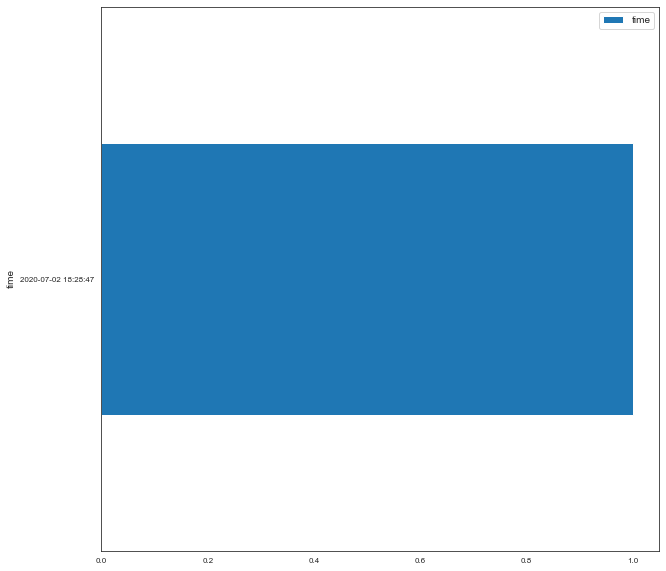

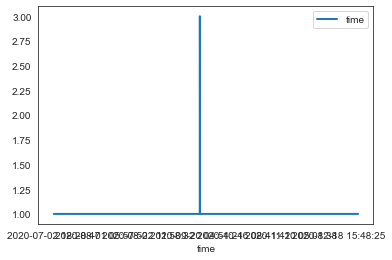

In [122]:

tweetsPerDay = data[['time']].groupby(data['time']).count()
tweetsPerDay.iloc[:1:].plot(kind='barh', figsize=(10,10), fontsize=8)
tweetsPerDay.plot(kind='line', linewidth=2.0)

<AxesSubplot:xlabel='favorite_count'>

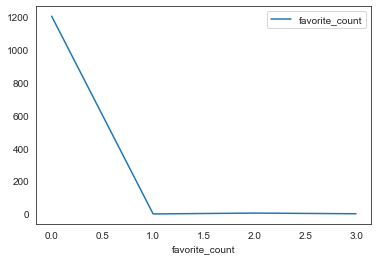

In [123]:
fev_tweets_count = data[['favorite_count']].groupby(data['favorite_count']).count()
fev_tweets_count.iloc[:4:].plot(kind='line')


In [124]:
from collections import Counter
import nltk
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [125]:
top_N = 100
stopwords = nltk.corpus.stopwords.words('english')
stopwords = stopwords + ['rt']
# RegEx for stopwords
RE_stopwords = r'\b(?:{})\b'.format('|'.join(stopwords))
# replace '|'-->' ' and drop all stopwords
words = (data.text
           .str.lower()
           .replace([r'\|', RE_stopwords], [' ', ''], regex=True)
           .str.cat(sep=' ')
           .split()
)

# generate DF out of Counter
words_data = pd.DataFrame(Counter(words).most_common(300),
                    columns=['Word', 'Frequency']).set_index('Word')



In [126]:
words_data

,Frequency
Word,
…,543
&amp;,521
',267
@shashitharoor,221
.,164
...,...
"book,",13
speak,13
@un,13


# We use the VADER Sentiment Analyzer in order to perform the sentiment analysis. 
# According to GeeksforGeeks, VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

In [127]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [128]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Text(0, 0.5, 'Count')

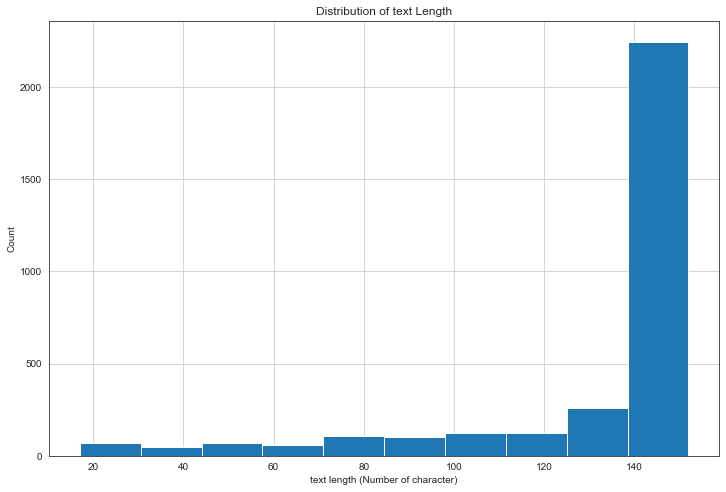

In [129]:
text_length = data["text"].dropna().map(lambda x: len(x))
plt.figure(figsize=(12,8))
text_length.loc[text_length < 1500].hist()
plt.title("Distribution of text Length")
plt.xlabel('text length (Number of character)')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

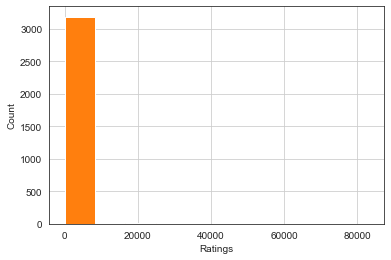

In [130]:
data.retweet_count.hist()
data.retweet_count.hist(bins=10)
plt.xlabel('Ratings')
plt.ylabel('Count')

In [131]:
## Cleaning the text input for betting understanding of Machine..##

##Converting all review into Lowercase..###
data['text']= data['text'].apply(lambda x: " ".join(word.lower() for word in x.split()))

In [132]:
## removing punctuation from review..#
import string
data['text']=data['text'].apply(lambda x:''.join([i for i in x  if i not in string.punctuation]))

In [133]:
## Remove Numbers from tweets...##
data['text']=data['text'].str.replace('[0-9]','')

In [134]:
from nltk.corpus import stopwords
nltk.download('stopwords')
#stopwords = pd.read_csv('/content/stop(1).txt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [135]:
stop_words=stopwords.words('english')

In [136]:
data['text']=data['text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))

In [137]:
import re #regular expression
import string
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    
    return text

clean = lambda x: clean_text(x)

In [138]:
data.head(5)

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset
0,2021-01-04 15:31:25,[],"[{'screen_name': 'NASA', 'name': 'NASA', 'id':...",160,None,1346117037215518722,en,None,26,False,Twitter for iPhone,second indian amp first malayali win nasa dist...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None
1,2021-01-04 14:45:02,[],"[{'screen_name': 'nankrishna', 'name': 'Nandit...",133,None,1346105363481804802,en,None,13,False,Twitter Web App,historian amp environmentalist nankrishnas tak...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None
2,2021-01-04 14:41:50,[],"[{'screen_name': 'ajinkyarahane88', 'name': 'A...",331,None,1346104556984287237,en,None,28,False,Twitter Web App,ajinkyarahane found strength teachings gita am...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None
3,2021-01-04 14:29:16,[],"[{'screen_name': 'PolitikKarma', 'name': 'Arju...",2,None,1346101395515006979,en,None,1,False,Twitter Web App,politikkarma paranb strongly favour vaccinatio...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None
4,2021-01-04 14:27:16,[],"[{'screen_name': 'rai_amit_kumar', 'name': 'Am...",50,None,1346100891930173440,en,None,0,False,Twitter Web App,raiamitkumar narendramodi police found single ...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None


In [139]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [140]:
from textblob import Word
data['text']= data['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))


In [141]:
import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['text']= data['text'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [142]:
text_set=data['text']

In [143]:
import re
import sys

# https://stackoverflow.com/a/49146722/330558
def remove_emoji(text_set):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
#text = remove_emoji(text_set)

In [144]:
def remove_emoji(text_set):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


In [145]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['text'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aadya  aaiofficial  aakarpatel  aalimjaveri  aamerjaveed  aamya  aamyas  \
0         0            0           0            0            0      0       0   
1         0            0           0            0            0      0       0   
2         0            0           0            0            0      0       0   
3         0            0           0            0            0      0       0   
4         0            0           0            0            0      0       0   
...     ...          ...         ...          ...          ...    ...     ...   
3207      0            0           0            0            0      0       0   
3208      0            0           0            0            0      0       0   
3209      0            0           0            0            0      0       0   
3210      0            0           0            0            0      0       0   
3211      0            0           0            0            0      0       0   

      aanganwadis  aapkagop

In [146]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['text'])
print(TFIDF)

  (0, 5146)	0.3198849635128898
  (0, 10642)	0.3198849635128898
  (0, 10243)	0.3198849635128898
  (0, 7336)	0.3198849635128898
  (0, 9668)	0.2405247979356794
  (0, 8744)	0.24844918245857234
  (0, 2369)	0.3044107232083265
  (0, 7682)	0.3198849635128898
  (0, 11413)	0.24298785718544721
  (0, 7190)	0.2849154860157474
  (0, 3051)	0.18821904389519697
  (0, 369)	0.1112815735529491
  (0, 6281)	0.16237629515571722
  (0, 9589)	0.24844918245857234
  (1, 5718)	0.4311554552800306
  (1, 6956)	0.29727465498357875
  (1, 6991)	0.34346423332255727
  (1, 10429)	0.2810670744493705
  (1, 7670)	0.4311554552800306
  (1, 2709)	0.4311554552800306
  (1, 3672)	0.3667140776767372
  (1, 369)	0.14999034960130794
  (2, 4175)	0.3203920721307737
  (2, 8162)	0.3203920721307737
  (2, 10391)	0.30489330075564214
  :	:
  (3209, 10076)	0.3229099734179073
  (3209, 2951)	0.24818456746788564
  (3209, 6944)	0.2160718659747651
  (3209, 8316)	0.19901969778830098
  (3210, 5036)	0.39716668711085507
  (3210, 2031)	0.3971666871108550

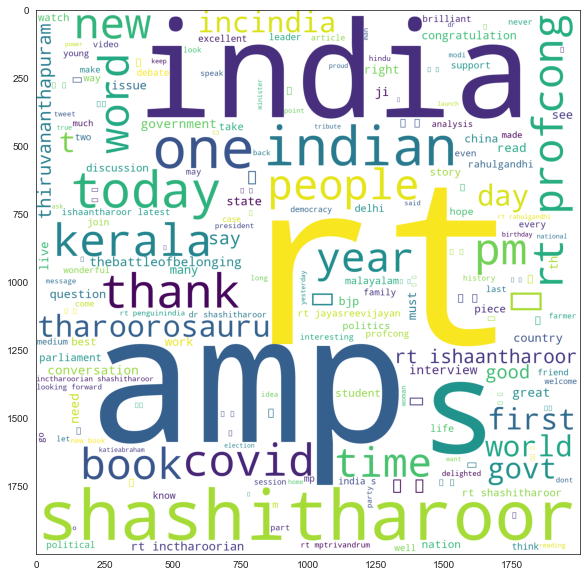

In [147]:
Review_wordcloud = ' '.join(data['text'])
Q_wordcloud=WordCloud(
                    background_color='white',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

In [148]:
freq = pd.Series(' '.join(data['text']).split()).value_counts()[0:20]
freq

rt               1200
amp               511
shashitharoor     284
india             245
indian            129
one               125
profcong          115
book              111
year              102
है                 94
today              93
pm                 92
covid              91
new                79
की                 78
incindia           73
day                73
word               70
people             69
ishaantharoor      68
dtype: int64

In [149]:
import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pcs\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [150]:
from textblob import TextBlob
data['polarity'] = data['text'].apply(lambda x: TextBlob(x).sentiment[0])
data[['text','polarity']].head(5)

,text,polarity
0,second indian amp first malayali win nasa dist...,0.262500
1,historian amp environmentalist nankrishnas tak...,0.000000
2,ajinkyarahane found strength teaching gita amp...,0.000000
3,politikkarma paranb strongly favour vaccinatio...,0.511111
4,raiamitkumar narendramodi police found single ...,-0.071429


In [151]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,time,hashtags,user_mentions,favorite_count,geo,id_str,lang,place,retweet_count,retweeted,source,text,location,name,time_zone,utc_offset,polarity
0,2021-01-04 15:31:25,[],"[{'screen_name': 'NASA', 'name': 'NASA', 'id':...",160,None,1346117037215518722,en,None,26,False,Twitter for iPhone,second indian amp first malayali win nasa dist...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None,0.262500
3,2021-01-04 14:29:16,[],"[{'screen_name': 'PolitikKarma', 'name': 'Arju...",2,None,1346101395515006979,en,None,1,False,Twitter Web App,politikkarma paranb strongly favour vaccinatio...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None,0.511111
8,2021-01-04 14:19:15,[],"[{'screen_name': 'narendramodi', 'name': 'Nare...",263,None,1346098873572360198,en,None,48,False,Twitter Web App,excellent piece rrajrao explains narendramodi ...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None,1.000000
9,2021-01-04 13:53:28,[],"[{'screen_name': 'munawar0018', 'name': 'munaw...",2176,None,1346092385906790400,en,None,467,False,Twitter Web App,munawar episode shame democracy country matur...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None,0.166667
14,2021-01-04 11:53:15,[],[],263,None,1346062133549703171,en,None,32,False,Twitter Web App,striking mainly keralas left govt give teacher...,New Delhi & Thiruvananthapuram,Shashi Tharoor,None,None,0.222222


In [154]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [155]:
sent_type(data['polarity'])

positive
neutral
neutral
positive
negative
neutral
neutral
neutral
positive
positive
neutral
neutral
neutral
neutral
positive
negative
neutral
neutral
negative
positive
neutral
negative
positive
positive
neutral
neutral
positive
positive
neutral
positive
neutral
positive
neutral
neutral
positive
positive
negative
positive
neutral
positive
positive
positive
neutral
positive
negative
positive
negative
positive
negative
neutral
positive
neutral
neutral
neutral
positive
negative
positive
positive
negative
neutral
positive
neutral
positive
positive
positive
positive
positive
neutral
positive
neutral
neutral
neutral
neutral
positive
positive
positive
positive
positive
neutral
neutral
neutral
positive
negative
negative
neutral
neutral
negative
negative
positive
neutral
neutral
neutral
neutral
negative
negative
positive
neutral
neutral
neutral
negative
neutral
neutral
positive
positive
positive
positive
positive
positive
neutral
neutral
neutral
positive
positive
positive
neutral
neutral
positi

In [156]:
data["category"]=data['polarity']

data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

data["category"]=data["category"].astype('category')
data.dtypes

time                object
hashtags            object
user_mentions       object
favorite_count       int64
geo                 object
id_str               int64
lang                object
place               object
retweet_count        int64
retweeted             bool
source              object
text                object
location            object
name                object
time_zone           object
utc_offset          object
polarity           float64
category          category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

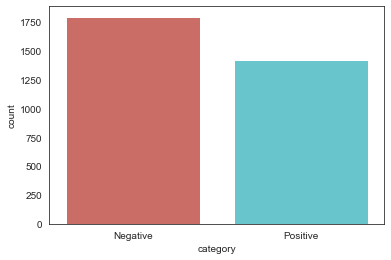

In [159]:
sns.countplot(x='category',data=data,palette='hls')

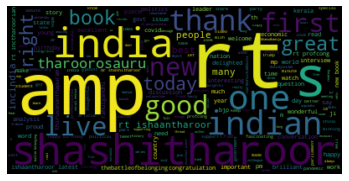

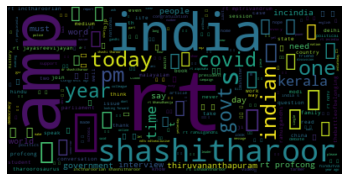

In [161]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.text.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.text.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=250).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
